## <center> Student Life and Academic Performance Survey - ML Project </center>


## By:
- Minal Alam
- Rayyan Ahmed
- Shaikh Abdul Rafay

# Table of contents:

- [Data Preprocessing for EDA and Model Training](#preeda)
    - [Standardizing University Names](#uninames)
    - [Standardizing Degree Names](#degnames)
    - [Extracurricular Activities Analysis](#extracurr)
    - [Exporting the Transformed data for PowerBi report](#export)

- [EDA](#eda)
- [Data Wrangling](#dataw)
    - [Handling Imbalanced Target Classes in GPA Prediction](#targethandling)
    - [Label Encoding](#LE)
    - [Feature Selection](#FS)
- [Feature Importance Analysis for Predicting University Students' GPA ](#anal)
- [Modeling Approach for GPA Prediction](#modelling)

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/student-data/student life data.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

In [3]:
#reading dataset
df = pd.read_csv(r"/kaggle/input/student-data/student life data.csv")
df.head()

,Timestamp,Username,University,Degree,Avg_Attendance,Avg_Study_time_per_day,Extracurricular_Activities,Avg_sleep_time,Household_Size,Workout,Free_time_Activity,University_society_member,Parents_Highest_Qaulification,GPA
0,2023/11/22 9:12:38 PM GMT+5,rayyanlaeeq@gmail.com,Fast,AI,90% - 100%,NaN,Sports,5-7 hours,5-6 members,"Yes, regularly",Reading,No,Master's Degree,3.0 - 3.9
1,2023/11/23 8:25:45 PM GMT+5,NaN,Fast NU,BS AI,90% - 100%,NaN,Sports,5-7 hours,5-6 members,"Yes, regularly",Watching TV/Movies,Yes,Master's Degree,3.0 - 3.9
2,2023/11/23 8:25:48 PM GMT+5,NaN,FAST-NU,BS-AI,90% - 100%,NaN,Gaming,5-7 hours,5-6 members,"Yes, regularly",Watching TV/Movies,No,Master's Degree,3.0 - 3.9
3,2023/11/24 12:47:21 PM GMT+5,NaN,Fast,Bscs,80%-90%,5-6 hours,Academic Clubs,5-7 hours,3-4 members,Occasionally,Watching TV/Movies,Yes,Bachelor's Degree,2.0 - 2.9
4,2023/11/24 3:03:49 PM GMT+5,NaN,Fast,Artificial intelligence,80%-90%,1-2 hours,Sports,5-7 hours,5-6 members,"No, I don't",Watching TV/Movies,No,Master's Degree,3.0 - 3.9


In [4]:
#dropping  Username and timestamp
df.drop(['Username' , 'Timestamp'] , axis=1 , inplace=True)
df

,University,Degree,Avg_Attendance,Avg_Study_time_per_day,Extracurricular_Activities,Avg_sleep_time,Household_Size,Workout,Free_time_Activity,University_society_member,Parents_Highest_Qaulification,GPA
0,Fast,AI,90% - 100%,NaN,Sports,5-7 hours,5-6 members,"Yes, regularly",Reading,No,Master's Degree,3.0 - 3.9
1,Fast NU,BS AI,90% - 100%,NaN,Sports,5-7 hours,5-6 members,"Yes, regularly",Watching TV/Movies,Yes,Master's Degree,3.0 - 3.9
2,FAST-NU,BS-AI,90% - 100%,NaN,Gaming,5-7 hours,5-6 members,"Yes, regularly",Watching TV/Movies,No,Master's Degree,3.0 - 3.9
3,Fast,Bscs,80%-90%,5-6 hours,Academic Clubs,5-7 hours,3-4 members,Occasionally,Watching TV/Movies,Yes,Bachelor's Degree,2.0 - 2.9
4,Fast,Artificial intelligence,80%-90%,1-2 hours,Sports,5-7 hours,5-6 members,"No, I don't",Watching TV/Movies,No,Master's Degree,3.0 - 3.9
...,...,...,...,...,...,...,...,...,...,...,...,...
204,University of Karachi.,MSc in Geography.,90% - 100%,1-2 hours,Arts and Culture;Volunteer Work,7-9 hours,7 or more members,"No, I don't",Reading,No,High School Diploma or Below,3.0 - 3.9
205,FAST,Bs Artificial Intelligence,80%-90%,3-4 hours,Sports,5-7 hours,5-6 members,"No, I don't",Socializing with Friends,No,Master's Degree,2.0 - 2.9
206,Fast,Artificial Intelligence,80%-90%,1-2 hours,Academic Clubs,Less than 5 hours,5-6 members,"No, I don't",Watching TV/Movies,Yes,High School Diploma or Below,3.0 - 3.9
207,Iqra University,Bs-Computer Science,90% - 100%,Less than 1 hour,Sports,5-7 hours,3-4 members,"Yes, regularly",Socializing with Friends,No,Master's Degree,3.0 - 3.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   University                     209 non-null    object
 1   Degree                         209 non-null    object
 2   Avg_Attendance                 209 non-null    object
 3   Avg_Study_time_per_day         206 non-null    object
 4   Extracurricular_Activities     205 non-null    object
 5   Avg_sleep_time                 209 non-null    object
 6   Household_Size                 209 non-null    object
 7   Workout                        209 non-null    object
 8   Free_time_Activity             209 non-null    object
 9   University_society_member      209 non-null    object
 10  Parents_Highest_Qaulification  209 non-null    object
 11  GPA                            209 non-null    object
dtypes: object(12)
memory usage: 19.7+ KB


In [6]:
df.nunique()

University                       105
Degree                           137
Avg_Attendance                     5
Avg_Study_time_per_day             5
Extracurricular_Activities        39
Avg_sleep_time                     4
Household_Size                     4
Workout                            3
Free_time_Activity                16
University_society_member          2
Parents_Highest_Qaulification      4
GPA                                4
dtype: int64

# Data Preprocessing for EDA and Model Training
<a id='preeda'></a>

### Overview
To enhance the efficiency of exploratory data analysis (EDA) and model training, it is crucial to standardize the format of key features such as 'University,' 'Degree,' and 'Extracurricular_Activities.' The current dataset exhibits variations in the formats of these fields. Standardizing them will not only provide a clean and consistent representation but also contribute to better model performance.

## Standardizing University Names
<a id = 'uninames'></a>

In [7]:
df['University'] = df['University'].str.upper()
uni_names = df['University'].unique()
print(uni_names)

['FAST' 'FAST NU' 'FAST-NU' 'FAST ' 'FAST NATIONAL UNIVERSITY '
 'FAST NUCES' 'FAST NUCES ' 'IBA KARACHI' 'NUCES FAST KARACHI'
 'OVAIS BIN AMER ' 'FAST-NUCES' 'BAHRIA UNIVERSITY' 'FAST UNIVERSITY '
 'FAST - NUCES' 'HOWARD UNIVERSITY' 'BAHRIA UNIVERSITY KARACHI CAMPUS'
 'BAHRIA ' 'BAHRIA UNIVERSITY ' 'BAHRIA UNIVERSITY KARACHI'
 'BAHRIA UNIVERSITY KARACHI CAMPUS ' 'NONE '
 'FAST NATIONAL UNIVERSITY OF COMPUTER AND EMERGING SCIENCES '
 'MAHAM KASHIF ' 'INDUS UNIVERSITY ' 'BUIC ' 'FAST UNIVERSITY' 'PAF KIET'
 'NED UNIVERSITY ' 'USMAN INSTITUTE OF TECHNOLOGY (UIT)'
 'UNIVERSITY OF KARACHI ' 'TECHNISCHE HOCHSCHULE INGOLSTADT'
 'NED UNIVERSITY OF ENGINEERING AND TECHNOLOGY' 'NED UET'
 'SIR SYED UNIVERSITY' 'NUCES FAST' 'BUKC' 'NED UNIVERSITY'
 'FAST NUCES KARACHI ' 'SINDH MADERSATUL ISLAM UNIVERSITY '
 'FAST - NUCES KARACHI' 'FAST-NUCES ' 'BAHRIA'
 'BAHRIA UNIVERSITY KARACHI ' 'BHARIA UNIVERSITY KARACHI CAMPUS '
 'USMAN INSTITUTE OF TECHNOLOGY ' 'FIZA'
 'DOW UNIVERSITY OF HEALTH SCIENCES' 'D

In [8]:
FAST_values = ['FAST', 'NUCES' , 'NATIONAL UNIVERSITY' , 'NU']
BU_values = ['BAHRIA', 'BU', 'BHARIA']
DOW_values = ['DOW']
NED_values = ['NED' , 'N.E.D' , 'N.E.D UNI']
UIT_values = ['USMAN']
NAN_values = ['MAHAM KASHIF', 'NONE', 'FIZA', 'OVAIS BIN AMER' , 'ABDULLAH']
KU_values = ['KARACHI UNIVERSITY' , 'UNIVERSITY OF KARACHI']
def standardize_uni(name):
    if any(keyword in name for keyword in FAST_values):
        return 'FAST'
    elif any(keyword in name for keyword in BU_values):
        return 'BU'
    elif any(keyword in name for keyword in DOW_values):
        return 'DOW'
    elif any(keyword in name for keyword in NED_values):
        return 'NED'
    elif any(keyword in name for keyword in UIT_values):
        return 'UIT'
    elif any(keyword in name for keyword in NAN_values):
        return np.nan
    else:
        return name
    
df['University'] = df['University'].apply(standardize_uni)
print(df['University'].unique())


['FAST' 'IBA KARACHI' nan 'BU' 'HOWARD UNIVERSITY' 'INDUS UNIVERSITY '
 'PAF KIET' 'NED' 'UIT' 'UNIVERSITY OF KARACHI '
 'TECHNISCHE HOCHSCHULE INGOLSTADT' 'SIR SYED UNIVERSITY'
 'SINDH MADERSATUL ISLAM UNIVERSITY ' 'DOW' 'IQRA UNIVERSITY '
 'IQRA UNIVERSITY' 'KARACHI UNIVERSITY ' 'IOBM' 'KIET'
 'JINNAH UNIVERSITY FOR WOMEN (1ST WOMEN UNIVERSITY)' 'COMSATS'
 'UNIVERSITY OF KARACHI' ' KARACHI UNIVERSITY ' 'UNIVERSITY OF KARACHI.']


## Standardizing Degree Names<a id = 'degnames'></a>

In [9]:
df['Degree'] = df['Degree'].str.upper()
degrees = df['Degree'].unique()
print(degrees)

['AI' 'BS AI' 'BS-AI' 'BSCS' 'ARTIFICIAL INTELLIGENCE '
 'ARTIFICIAL INTELLIGENCE' 'BS CYBER SECURITY '
 'BACHELOR OF COMPUTER SCIENCE' 'BACHELORS IN COMPUTER SCIENCE ' 'BS'
 'BBA' 'AI ' 'BS(CS' 'BS (SE)' 'BACHELORS OF SCIENCE IN BIOLOGY'
 'BS INFORMATION TECHNOLOGY ' 'BSIT' 'BS(IT)' 'NONE ' 'BS-CS'
 'COMPUTER SCIENCE ' 'BACHELORS IN SOFTWARE ENGINEERING ' "BACHELOR'S "
 'BACHELOR OF SCIENCE INFORMATION TECHNOLOGY' 'BBA ' 'MEDIA SCIENCE '
 'BSC IT' "BACHELOR'S IN COMPUTER SCIENCE " 'BE AVIONICS'
 'BACHELORS IN BUSINESS ADMINISTRATION' 'BS ACCOUNTS AND FINANCE'
 'COMPUTATIONAL FINANCE ' 'BS(SE)' 'DOCTOR OF PHARMACY '
 'COMPUTER SCIENCE AND ARTIFICIAL INTELLIGENCE' 'PHYSICS' 'BCIT'
 'BS PHYSICS ' 'BS SOFTWARE ENGINEERING' 'BS CS' 'BSE' 'BCE'
 'BSC IN PHYSICS' 'CS' 'BS(CS)' "BACHELOR'S DEGREE"
 'COMPUTER SCIENCE (BACHELORS)' "BACHELOR'S IN COMPUTER SCIENCE" 'MASTER '
 'COMPUTER SCIENCE' 'BS ARTIFICIAL INTELLIGENCE ' ' BSIT' 'BS PHYSICS'
 'BS(AI)' 'BSAI'
 'BACHELOR OF ENGINEERING ( ELECTRI

In [10]:
AI_values = ['AI', 'ARTIFICIAL']
CS_values = ['CS', 'COMPUTER SCIENCE']
CYS_values = ['CYS', 'CYBER']
SE_values = ['SE', 'SOFTWARE']
IT_values = ['IT', 'INFORMATION']
BT_values = ['BT', 'BIOTECHNOLOGY']
BBA_values = ['BBA', 'BUSINESS']
EE_values = ['EE', 'ELECTRICAL' , 'E.E']
MS_values = ['MASTER']
B_values = ['BACHELOR' , 'HONS' , 'BSC']
CE_values = ['C.E' , 'CE']
MSC_values = ['GEOGRAPHY' , 'MSC']
def standardize_degs(name):
    if any(keyword.lower() in name.lower() for keyword in AI_values):
        return 'BS-AI'
    elif any(keyword.lower() in name.lower() for keyword in CS_values):
        return 'BS-CS'
    elif any(keyword.lower() in name.lower() for keyword in CYS_values):
        return 'BS-CYS'
    elif any(keyword.lower() in name.lower() for keyword in SE_values):
        return 'BS-SE'
    elif any(keyword.lower() in name.lower() for keyword in IT_values):
        return 'BS-IT'
    elif any(keyword.lower() in name.lower() for keyword in BT_values):
        return 'BS-BT'
    elif any(keyword.lower() in name.lower() for keyword in BBA_values):
        return 'BBA'
    elif any(keyword.lower() in name.lower() for keyword in EE_values):
        return 'BS-EE'
    elif any(keyword.lower() in name.lower() for keyword in CE_values):
        return 'BS CE'
    elif any(keyword.lower() in name.lower() for keyword in MS_values):
        return 'MASTERS'
    elif any(keyword.lower() in name.lower() for keyword in B_values):
        return 'BACHELOR'
    elif any(keyword.lower() in name.lower() for keyword in MSC_values):
        return 'GEOGRAPHY'
    elif 'NONE' in name:
        return np.nan
    else:
        return name

df['Degree'] = df['Degree'].apply(standardize_degs)
print(df['Degree'].unique())



['BS-AI' 'BS-CS' 'BS-CYS' 'BS' 'BBA' 'BS-SE' 'BS CE' 'BS-IT' nan
 'BACHELOR' 'DOCTOR OF PHARMACY ' 'BS-EE' 'MASTERS' 'BS-BT' 'BA'
 'BS-INDUSTRIAL MANAGEMENT ' 'DOCTOR OF PHYSICAL THERAPY ' 'GEOGRAPHY']


## Extracurricular Activities Analysis
<a id = extracurr></a>
The 'Extracurricular_Activities' column represents multiple-choice responses indicating various activities that individuals have participated in. To gain insights into the most frequently selected activities, we performed the following steps:

- Utilized one-hot encoding to convert the categorical 'Extracurricular_Activities' into dummy/indicator variables.
- Created binary columns for each unique activity, indicating whether an individual participated in that specific activity.
- Calculated the sum of each one-hot encoded column to determine the frequency of each activity.
- Identified the activity with the maximum frequency, indicating the most frequently selected activity.
- Concatenating the one hot encoded Extracurricular_Activities dataframe to the main dataframe
- Dropping the actual Extracurricular_Activities column 

In [11]:
df['Extracurricular_Activities'].unique()

array(['Sports', 'Gaming', 'Academic Clubs', 'Sports;Volunteer Work',
       'I don’t 🗿',
       'Work on my skills but i am not consistent with it too', 'Work',
       'Arts and Culture', nan, 'Sports;Academic Clubs', 'Volunteer Work',
       'Arts and Culture;Academic Clubs',
       'Sports;Arts and Culture;Academic Clubs;Volunteer Work;Business ',
       'Nil', 'non', 'Sports;Academic Clubs;Volunteer Work',
       'Arts and Culture;', 'Sports;Arts and Culture',
       'Academic Clubs;Volunteer Work', 'Arts and Culture;Volunteer Work',
       'Nothing', 'Nthg', 'Gym', 'Sports;', 'Societies ', 'Sports;Other',
       'Sports;Arts and Culture;Academic Clubs;Volunteer Work',
       'Arts and Culture;Volunteer Work;Online courses',
       'Arts and Culture;Academic Clubs;Volunteer Work', 'Crypto Trading',
       'Sports;Arts and Culture;Academic Clubs',
       'Sports;Volunteer Work;Gaming', 'Nill', 'nothing ',
       'Sports;Arts and Culture;Academic Clubs;Volunteer Work;',
       'Nothi

In [12]:
df['Extracurricular_Activities'].replace(np.nan , 'NONE' , inplace = True)

In [13]:
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].str.upper()

def clean_extracurricular(value):
    if pd.Series(value).str.contains('NIL|NILL|NONE|NOTHING|NTHG|NON|I DON’T 🗿|i dont').any():
        return np.nan
    elif pd.Series(value).str.contains('WORK ON MY SKILLS BUT I AM NOT CONSISTENT WITH IT TOO').any():
        return 'WORK'
    else:
        return value

df['Extracurricular_Activities'] = df['Extracurricular_Activities'].apply(clean_extracurricular)


In [14]:
df.head()

,University,Degree,Avg_Attendance,Avg_Study_time_per_day,Extracurricular_Activities,Avg_sleep_time,Household_Size,Workout,Free_time_Activity,University_society_member,Parents_Highest_Qaulification,GPA
0,FAST,BS-AI,90% - 100%,NaN,SPORTS,5-7 hours,5-6 members,"Yes, regularly",Reading,No,Master's Degree,3.0 - 3.9
1,FAST,BS-AI,90% - 100%,NaN,SPORTS,5-7 hours,5-6 members,"Yes, regularly",Watching TV/Movies,Yes,Master's Degree,3.0 - 3.9
2,FAST,BS-AI,90% - 100%,NaN,GAMING,5-7 hours,5-6 members,"Yes, regularly",Watching TV/Movies,No,Master's Degree,3.0 - 3.9
3,FAST,BS-CS,80%-90%,5-6 hours,ACADEMIC CLUBS,5-7 hours,3-4 members,Occasionally,Watching TV/Movies,Yes,Bachelor's Degree,2.0 - 2.9
4,FAST,BS-AI,80%-90%,1-2 hours,SPORTS,5-7 hours,5-6 members,"No, I don't",Watching TV/Movies,No,Master's Degree,3.0 - 3.9


In [15]:
extra_curr = df['Extracurricular_Activities'].str.get_dummies(sep=';')


In [16]:
extra_curr

,ACADEMIC CLUBS,ARTS AND CULTURE,BUSINESS,CRYPTO TRADING,GAMING,GYM,I DONT,MUSIC,ONLINE COURSES,OTHER,SOCIETIES,SPORTS,VOLUNTEER WORK,WORK
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,0,1,0,0,0,0,0,0,0,0,0,0,1,0
205,0,0,0,0,0,0,0,0,0,0,0,1,0,0
206,1,0,0,0,0,0,0,0,0,0,0,0,0,0
207,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [17]:
dd = extra_curr.apply(lambda x: x.tolist().count(1), axis=0)
dd = dd.sort_values(ascending=False)
dd

SPORTS              123
VOLUNTEER WORK       72
ARTS AND CULTURE     51
ACADEMIC CLUBS       45
GAMING                2
GYM                   2
WORK                  2
BUSINESS              1
CRYPTO TRADING        1
I DONT                1
MUSIC                 1
ONLINE COURSES        1
OTHER                 1
SOCIETIES             1
dtype: int64

In [18]:
#Merging the dataset with one hot encoded data
edf= extra_curr[['SPORTS' , 'VOLUNTEER WORK'  , 'ARTS AND CULTURE' , 'ACADEMIC CLUBS']]
df = pd.concat([df , edf ], axis=1)
df

,University,Degree,Avg_Attendance,Avg_Study_time_per_day,Extracurricular_Activities,Avg_sleep_time,Household_Size,Workout,Free_time_Activity,University_society_member,Parents_Highest_Qaulification,GPA,SPORTS,VOLUNTEER WORK,ARTS AND CULTURE,ACADEMIC CLUBS
0,FAST,BS-AI,90% - 100%,NaN,SPORTS,5-7 hours,5-6 members,"Yes, regularly",Reading,No,Master's Degree,3.0 - 3.9,1,0,0,0
1,FAST,BS-AI,90% - 100%,NaN,SPORTS,5-7 hours,5-6 members,"Yes, regularly",Watching TV/Movies,Yes,Master's Degree,3.0 - 3.9,1,0,0,0
2,FAST,BS-AI,90% - 100%,NaN,GAMING,5-7 hours,5-6 members,"Yes, regularly",Watching TV/Movies,No,Master's Degree,3.0 - 3.9,0,0,0,0
3,FAST,BS-CS,80%-90%,5-6 hours,ACADEMIC CLUBS,5-7 hours,3-4 members,Occasionally,Watching TV/Movies,Yes,Bachelor's Degree,2.0 - 2.9,0,0,0,1
4,FAST,BS-AI,80%-90%,1-2 hours,SPORTS,5-7 hours,5-6 members,"No, I don't",Watching TV/Movies,No,Master's Degree,3.0 - 3.9,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,UNIVERSITY OF KARACHI.,GEOGRAPHY,90% - 100%,1-2 hours,ARTS AND CULTURE;VOLUNTEER WORK,7-9 hours,7 or more members,"No, I don't",Reading,No,High School Diploma or Below,3.0 - 3.9,0,1,1,0
205,FAST,BS-AI,80%-90%,3-4 hours,SPORTS,5-7 hours,5-6 members,"No, I don't",Socializing with Friends,No,Master's Degree,2.0 - 2.9,1,0,0,0
206,FAST,BS-AI,80%-90%,1-2 hours,ACADEMIC CLUBS,Less than 5 hours,5-6 members,"No, I don't",Watching TV/Movies,Yes,High School Diploma or Below,3.0 - 3.9,0,0,0,1
207,IQRA UNIVERSITY,BS-CS,90% - 100%,Less than 1 hour,SPORTS,5-7 hours,3-4 members,"Yes, regularly",Socializing with Friends,No,Master's Degree,3.0 - 3.9,1,0,0,0


# EDA
<a id= eda></a>


In [19]:
print("DataFrame Information:")
print("-" * 30)
print('DF Shape: ' ,df.shape)
print('number of Columns: ' ,len(df.columns))
print('number of Observations: ' ,len(df))
print('Number of values in df: ' , df.count().sum())
print('Total Number of Missing values in df: ' , df.isna().sum().sum())
print('percentage of Missing values : ' ,  "{:.2f}".format(df.isna().sum().sum()/df.count().sum() *100),'%')
print('Total Number of Duplicated records in df : ' , df.duplicated().sum().sum())
print('percentage of Duplicated values : ' ,  "{:.2f}".format(df.duplicated().sum().sum()/df.count().sum() *100),'%')

DataFrame Information:
------------------------------
DF Shape:  (209, 16)
number of Columns:  16
number of Observations:  209
Number of values in df:  3321
Total Number of Missing values in df:  23
percentage of Missing values :  0.69 %
Total Number of Duplicated records in df :  1
percentage of Duplicated values :  0.03 %


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   University                     204 non-null    object
 1   Degree                         208 non-null    object
 2   Avg_Attendance                 209 non-null    object
 3   Avg_Study_time_per_day         206 non-null    object
 4   Extracurricular_Activities     195 non-null    object
 5   Avg_sleep_time                 209 non-null    object
 6   Household_Size                 209 non-null    object
 7   Workout                        209 non-null    object
 8   Free_time_Activity             209 non-null    object
 9   University_society_member      209 non-null    object
 10  Parents_Highest_Qaulification  209 non-null    object
 11  GPA                            209 non-null    object
 12  SPORTS                         209 non-null    int64 
 13  VOLUN

In [21]:
df.nunique()

University                       23
Degree                           17
Avg_Attendance                    5
Avg_Study_time_per_day            5
Extracurricular_Activities       29
Avg_sleep_time                    4
Household_Size                    4
Workout                           3
Free_time_Activity               16
University_society_member         2
Parents_Highest_Qaulification     4
GPA                               4
SPORTS                            2
VOLUNTEER WORK                    2
ARTS AND CULTURE                  2
ACADEMIC CLUBS                    2
dtype: int64

In [22]:
df.describe(include=('O'))

,University,Degree,Avg_Attendance,Avg_Study_time_per_day,Extracurricular_Activities,Avg_sleep_time,Household_Size,Workout,Free_time_Activity,University_society_member,Parents_Highest_Qaulification,GPA
count,204,208,209,206,195,209,209,209,209,209,209,209
unique,23,17,5,5,29,4,4,3,16,2,4,4
top,FAST,BS-CS,80%-90%,1-2 hours,SPORTS,5-7 hours,5-6 members,"No, I don't",Watching TV/Movies,No,Master's Degree,3.0 - 3.9
freq,85,52,92,77,67,96,97,78,82,113,74,109


In [23]:
%matplotlib inline

<Figure size 1000x600 with 0 Axes>

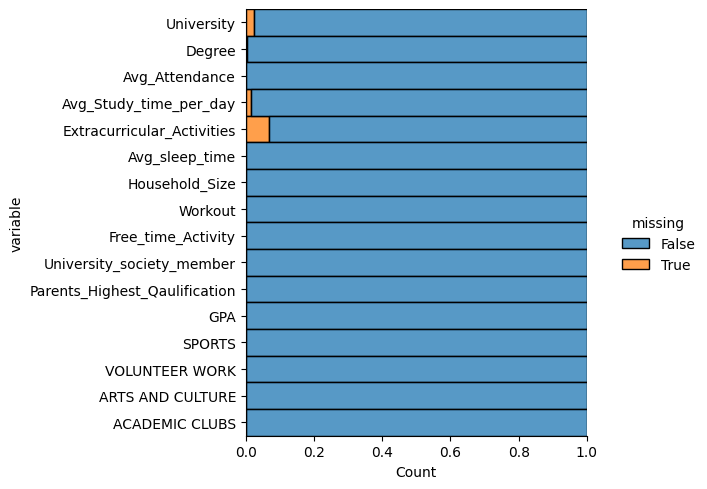

In [24]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.show()

In [25]:
df.columns

Index(['University', 'Degree', 'Avg_Attendance', 'Avg_Study_time_per_day',
       'Extracurricular_Activities', 'Avg_sleep_time', 'Household_Size',
       'Workout', 'Free_time_Activity', 'University_society_member',
       'Parents_Highest_Qaulification', 'GPA', 'SPORTS', 'VOLUNTEER WORK',
       'ARTS AND CULTURE', 'ACADEMIC CLUBS'],
      dtype='object')

In [26]:
for i in df.columns:
    if i == 'Extracurricular_Activities':
        continue
    print('\n--------------------------------')
    print(f'\t{i}')
    print(f'--------------------------------')
    print(df[i].value_counts())
    print('--------------------------------')   


--------------------------------
	University
--------------------------------
University
FAST                                                  85
BU                                                    44
NED                                                   29
DOW                                                   12
UNIVERSITY OF KARACHI                                  6
KARACHI UNIVERSITY                                     5
UNIVERSITY OF KARACHI                                  4
IQRA UNIVERSITY                                        3
UIT                                                    2
 KARACHI UNIVERSITY                                    1
COMSATS                                                1
JINNAH UNIVERSITY FOR WOMEN (1ST WOMEN UNIVERSITY)     1
KIET                                                   1
IOBM                                                   1
SINDH MADERSATUL ISLAM UNIVERSITY                      1
IQRA UNIVERSITY                                        

In [27]:
gpa = pd.DataFrame(df['GPA'].value_counts()).reset_index()
gpa.columns = ['GPA', 'count']


fig = px.pie(gpa, values='count', names='GPA',  
       color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title=  f'GPA Percentage',  title_x = 0.5)

# Data Wrangling <a id= 'dataw'></a>

## Handling Imbalanced Target Classes in GPA Prediction <a id ='targethandling'></a>

We've encountered an issue with extremely low value counts for two specific ranges: 4 and 1-1.9. Addressing this imbalance is crucial for the model's performance.

## Feature Balancing Approach

One potential solution is to employ feature balancing. However, there are challenges associated with this method:

- **Low Combined Percentage:** The classes 4 and 1-1.9 constitute only 10% of the total records.

- **Insufficient Records for Similarity:** Generating similar records through oversampling becomes challenging due to the limited number of records.

## Alternative Technique: Combine Classes

To overcome the limitations of feature balancing, we propose an alternative technique - combining certain classes to create broader categories.

### Combining Classes

1. **Classes 1 - 1.9 and 2 - 2.9:** Combine to create a new class, "1-2.9."
   
2. **Classes 4 and 3 - 3.9:** Combine to create a new class, "3 - 4."

This reclassification allows for a more balanced representation of the data across classes, mitigating the issue of low counts in the original 4 and 1-1.9 ranges.

## Testing Both Approaches

To determine the most effective strategy, we will conduct model testing with both the original target classes and the modified classes. This comparative analysis will help us identify the approach that yields the best results for our GPA prediction model.

Please note that the motivation behind this adjustment is the difficulty in gathering sufficient records for students falling in the 1-1.9 range and the 4 range. By combining classes, we aim to enhance the model's generalization capabilities and improve its performance across all GPA ranges.


In [28]:
map = {'0.0 - 1.9' : '0.0 - 2.9' , 	'2.0 - 2.9' : '0.0 - 2.9'	,'3.0 - 3.9': '3.0 - 4'	 , '4' : '3.0 - 4'}
df['new_GPA'] = df['GPA'].replace(map)
df

,University,Degree,Avg_Attendance,Avg_Study_time_per_day,Extracurricular_Activities,Avg_sleep_time,Household_Size,Workout,Free_time_Activity,University_society_member,Parents_Highest_Qaulification,GPA,SPORTS,VOLUNTEER WORK,ARTS AND CULTURE,ACADEMIC CLUBS,new_GPA
0,FAST,BS-AI,90% - 100%,NaN,SPORTS,5-7 hours,5-6 members,"Yes, regularly",Reading,No,Master's Degree,3.0 - 3.9,1,0,0,0,3.0 - 4
1,FAST,BS-AI,90% - 100%,NaN,SPORTS,5-7 hours,5-6 members,"Yes, regularly",Watching TV/Movies,Yes,Master's Degree,3.0 - 3.9,1,0,0,0,3.0 - 4
2,FAST,BS-AI,90% - 100%,NaN,GAMING,5-7 hours,5-6 members,"Yes, regularly",Watching TV/Movies,No,Master's Degree,3.0 - 3.9,0,0,0,0,3.0 - 4
3,FAST,BS-CS,80%-90%,5-6 hours,ACADEMIC CLUBS,5-7 hours,3-4 members,Occasionally,Watching TV/Movies,Yes,Bachelor's Degree,2.0 - 2.9,0,0,0,1,0.0 - 2.9
4,FAST,BS-AI,80%-90%,1-2 hours,SPORTS,5-7 hours,5-6 members,"No, I don't",Watching TV/Movies,No,Master's Degree,3.0 - 3.9,1,0,0,0,3.0 - 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,UNIVERSITY OF KARACHI.,GEOGRAPHY,90% - 100%,1-2 hours,ARTS AND CULTURE;VOLUNTEER WORK,7-9 hours,7 or more members,"No, I don't",Reading,No,High School Diploma or Below,3.0 - 3.9,0,1,1,0,3.0 - 4
205,FAST,BS-AI,80%-90%,3-4 hours,SPORTS,5-7 hours,5-6 members,"No, I don't",Socializing with Friends,No,Master's Degree,2.0 - 2.9,1,0,0,0,0.0 - 2.9
206,FAST,BS-AI,80%-90%,1-2 hours,ACADEMIC CLUBS,Less than 5 hours,5-6 members,"No, I don't",Watching TV/Movies,Yes,High School Diploma or Below,3.0 - 3.9,0,0,0,1,3.0 - 4
207,IQRA UNIVERSITY,BS-CS,90% - 100%,Less than 1 hour,SPORTS,5-7 hours,3-4 members,"Yes, regularly",Socializing with Friends,No,Master's Degree,3.0 - 3.9,1,0,0,0,3.0 - 4


In [29]:
gpa = pd.DataFrame(df['new_GPA'].value_counts()).reset_index()
gpa.columns = ['new_GPA', 'count']


fig = px.pie(gpa, values='count', names='new_GPA',  
       color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title=  f'new_GPA Percentage',  title_x = 0.5)

### Label Encoding <a id = 'LE'></a>

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [31]:
correlation_matrix = df.corr()

correlations_with_gpa = correlation_matrix['GPA']
sorted_features_gpa = correlations_with_gpa.abs().sort_values(ascending=False)
correlation_df_gpa = pd.DataFrame({
    'Feature': sorted_features_gpa.index,
    'Correlation with GPA': sorted_features_gpa.values
})


correlations_with_new_gpa = correlation_matrix['new_GPA']
sorted_features_new_gpa = correlations_with_new_gpa.abs().sort_values(ascending=False)
correlation_df_new_gpa = pd.DataFrame({
    'Feature': sorted_features_new_gpa.index,
    'Correlation with new_GPA': sorted_features_new_gpa.values
})


combined_correlation_df = pd.merge(correlation_df_gpa, correlation_df_new_gpa, on='Feature', how='outer')

combined_correlation_df


,Feature,Correlation with GPA,Correlation with new_GPA
0,GPA,1.000000,0.891295
1,new_GPA,0.891295,1.000000
2,Avg_Attendance,0.240198,0.259324
3,Household_Size,0.211649,0.132098
4,Parents_Highest_Qaulification,0.190446,0.165101
5,VOLUNTEER WORK,0.155680,0.101543
6,ACADEMIC CLUBS,0.116880,0.064516
7,Avg_sleep_time,0.114038,0.108395
8,Avg_Study_time_per_day,0.090475,0.065796
9,Degree,0.075706,0.062528


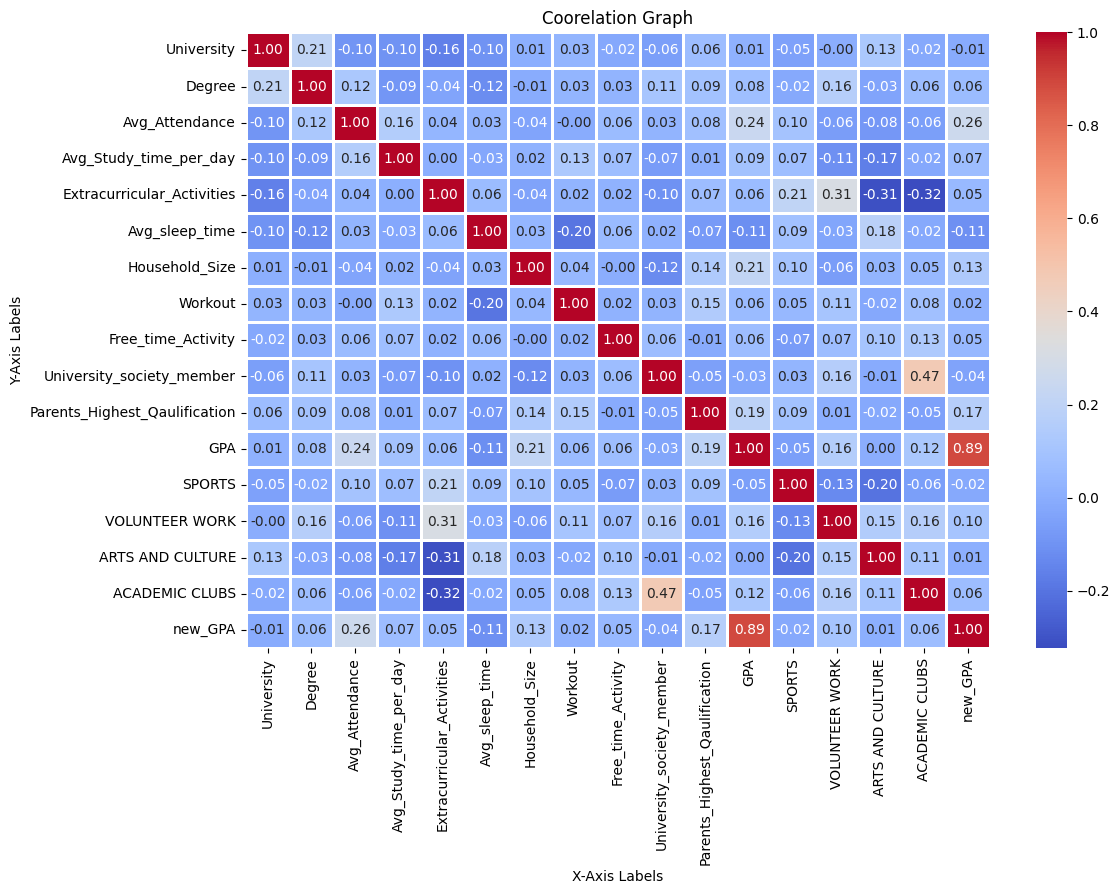

In [32]:
data = df.corr()

plt.figure(figsize=(12, 8))  # Optional: Adjust figure size
sns.heatmap(data, annot=True, cmap='coolwarm', linewidths=2, fmt=".2f", annot_kws={"size": 10})

#Add labels and title (customize as needed)
plt.xlabel("X-Axis Labels")
plt.ylabel("Y-Axis Labels")
plt.title("Coorelation Graph")

#Show the plot
plt.show()

In [33]:
df = df.apply(lambda col: col.fillna(col.mode()))

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif   


In [35]:
y = df.pop('GPA')
y2 = df.pop('new_GPA')
x = df
x2 = df

## Feature Selection <a id= 'FS'></a>

- Tree-based feature importance:
- Select KBest
- Variance Threshold

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x, y)

rf2 = RandomForestClassifier()
rf2.fit(x, y2)

feature_importances1 = rf.feature_importances_
top_k_features1 = sorted(zip(x.columns, feature_importances1), key=lambda x: x[1], reverse=True)
top_features1, importances1 = zip(*top_k_features1)

feature_importances2 = rf2.feature_importances_
top_k_features2 = sorted(zip(x.columns, feature_importances2), key=lambda x: x[1], reverse=True)
top_features2, importances2 = zip(*top_k_features2)

importance_df = pd.DataFrame({
    'Features': top_features2,
    'GPA': importances1,  
    'new_GPA': importances2
})

fig = px.bar(importance_df, x='Features', y=['GPA', 'new_GPA'], barmode='group',
             title='Feature Importances in RandomForestClassifier',
             labels={'Importance': 'Feature Importance'}, height=400)
fig.update_layout(xaxis_title='Feature', yaxis_title='Importance')

fig.show()


In [37]:

kbest = SelectKBest(f_classif, k=6)
x_selected_y1 = kbest.fit_transform(x, y)
kbest1 = SelectKBest(f_classif, k=6)
x_selected_y2 = kbest1.fit_transform(x, y)


print('Selected features for GPA:',  x.columns[kbest.get_support()].tolist())


Selected features for GPA: ['Avg_Attendance', 'Avg_Study_time_per_day', 'Avg_sleep_time', 'Household_Size', 'Parents_Highest_Qaulification', 'VOLUNTEER WORK']


In [38]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.)
X_selected = selector.fit_transform(x2)
selected_indices = selector.get_support(indices=True)
print('Selected features for GPA:',  x.columns[selector.get_support()].tolist())

Selected features for GPA: ['University', 'Degree', 'Avg_Attendance', 'Avg_Study_time_per_day', 'Extracurricular_Activities', 'Avg_sleep_time', 'Household_Size', 'Workout', 'Free_time_Activity', 'University_society_member', 'Parents_Highest_Qaulification', 'SPORTS', 'VOLUNTEER WORK', 'ARTS AND CULTURE', 'ACADEMIC CLUBS']


# Feature Importance Analysis for Predicting University Students' GPA <a id= 'anal'></a>

### 1. Random Forest Tree-Based Feature Importance

The Random Forest algorithm was employed to determine feature importance. The top features identified were:

- Degree
- Avg_Study_time_per_day
- Avg_Attendance
- Extracurricular_Activities
- Free_time_Activity
- Household_Size

These features are deemed crucial in predicting a student's GPA, as they carry significant weight according to the Random Forest model.

### 2. SelectKBest

Utilizing the SelectKBest method with the f_classif statistical test, the following features were identified as most relevant:

- Avg_Attendance
- Avg_Study_time_per_day
- Avg_sleep_time
- Household_Size
- Parents_Highest_Qualification
- Volunteer_Work

These features exhibit a strong statistical association with students' GPA, suggesting their importance in the predictive model.

### 3. VarianceThreshold

Applying the VarianceThreshold method, features with high variance were retained. The selected features include:

- University
- Degree
- Avg_Study_time_per_day
- Extracurricular_Activities
- Avg_sleep_time
- Free_time_Activity
- Parents_Highest_Qualification

These features are characterized by significant variability within the dataset, indicating their potential impact on GPA.

## Conclusion

The convergence of results from different feature selection techniques strengthens the confidence in the identified features' importance. The key factors influencing a student's GPA encompass the nature of their degree, study habits (such as average study time and attendance), engagement in extracurricular activities, free time activities, household size, and parental qualifications.

Educational institutions and policymakers can leverage these insights to develop targeted interventions and support systems to enhance student academic performance. Further analysis and model development can be undertaken to build a predictive model for GPA based on these crucial features, facilitating early identification of students who may benefit from additional support.


## Modeling Approach for GPA Prediction <a id= 'modelling'></a>

In our modeling process, we aim to predict the target variable GPA. Our objective is to assess the performance of our models and identify the most effective techniques for feature selection and balancing given the limitations of the small dataset.

### Considerations

- **Data Size Limitation:**
  - The small dataset size requires careful consideration of feature selection and balancing techniques to avoid overfitting.

- **Performance Metrics:**
  - We will use appropriate evaluation metrics, such as accuracy score and F1 score, to assess the model performance.

### Experimentation Plan

1. **Model Training:**
   - Train machine learning models for GPA prediction using various datasets with different feature selection and balancing techniques.

2. **Evaluation:**
   - Evaluate the models' performance on test sets.

3. **Comparison:**
   - Compare and analyze the performance of models across different datasets and techniques.

4. **Optimization:**
   - Fine-tune the models based on the insights gained from the initial comparisons.

### Conclusion

By systematically testing the models on various datasets and experimenting with feature selection and balancing techniques, we aim to identify the optimal approach for predicting GPA. This iterative process will provide valuable insights into maximizing model performance with a small dataset.

Stay tuned for the results and analysis!

In [39]:
from imblearn.over_sampling import RandomOverSampler
from  sklearn.model_selection import train_test_split

x = df[['Avg_Attendance', 'Avg_Study_time_per_day', 'Avg_sleep_time', 'Household_Size', 'Parents_Highest_Qaulification', 'VOLUNTEER WORK']]
ros = RandomOverSampler(random_state=42)
x_resampled1, y_resampled1 = ros.fit_resample(x ,y)
x_resampled_train1 ,x_resample_test1 , y_resample_train1 , y_resample_test1 = train_test_split( x_resampled1, y_resampled1 , train_size= 0.8 , random_state=0)


In [40]:
x_resampled_train1.shape

(348, 6)

In [41]:
from sklearn.metrics import accuracy_score ,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier , VotingClassifier ,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import Perceptron

In [42]:

import warnings
warnings.filterwarnings("ignore")


classifiers = [
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
    GradientBoostingClassifier(),
    XGBClassifier(),
    SVC()]

# Create parameter grids for each classifier
param_grids = [
    {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
    {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]},
    {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]},
    {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']},
    ]


# Initialize lists to store results
results = {'Classifier': [], 'Best Parameters': [], 'Train Accuracy': [], 'Test Accuracy': [] , 'Train F1 score' : [] , 'Test F1 score' : [] }

# Training phase
for classifier, param_grid in zip(classifiers, param_grids):
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(x_resampled_train1, y_resample_train1)
    
    # Get the best model from the grid search
    best_model = grid_search.best_estimator_
    
    # Store classifier name and best parameters
    results['Classifier'].append(classifier.__class__.__name__)
    results['Best Parameters'].append(grid_search.best_params_)
    
    # Store training accuracy
    train_accuracy = accuracy_score(y_resample_train1, best_model.predict(x_resampled_train1))
    results['Train Accuracy'].append(train_accuracy)

    test_accuracy = accuracy_score(y_resample_test1, best_model.predict(x_resample_test1))
    results['Test Accuracy'].append(test_accuracy)

   
    train_f1score = f1_score(y_resample_train1, best_model.predict(x_resampled_train1), average='weighted')
    results['Train F1 score'].append(train_f1score)

    
    test_f1score = f1_score(y_resample_test1, best_model.predict(x_resample_test1), average='weighted')
    results['Test F1 score'].append(test_f1score)




In [43]:
rf_best_params = results['Best Parameters'][results['Classifier'].index('RandomForestClassifier')]
dt_best_params = results['Best Parameters'][results['Classifier'].index('DecisionTreeClassifier')]
knn_best_params = results['Best Parameters'][results['Classifier'].index('KNeighborsClassifier')]
ada_best_params = results['Best Parameters'][results['Classifier'].index('AdaBoostClassifier')]
gb_best_params = results['Best Parameters'][results['Classifier'].index('GradientBoostingClassifier')]
xgb_best_params = results['Best Parameters'][results['Classifier'].index('XGBClassifier')]
svc_best_params = results['Best Parameters'][results['Classifier'].index('SVC')]

voting_classifiers = [
    ('rf', RandomForestClassifier(**rf_best_params)),
    ('dt', DecisionTreeClassifier(**dt_best_params)),
    ('knn', KNeighborsClassifier(**knn_best_params)),
    ('ada', AdaBoostClassifier(**ada_best_params)),
    ('gb', GradientBoostingClassifier(**gb_best_params)),
    ('xgb', XGBClassifier(**xgb_best_params)),
    ('svc', SVC(**svc_best_params))
]

voting_classifier = VotingClassifier(estimators=voting_classifiers, voting='hard')

voting_classifier.fit(x_resampled_train1, y_resample_train1)

voting_train_accuracy = accuracy_score(y_resample_train1, voting_classifier.predict(x_resampled_train1))
voting_test_accuracy = accuracy_score(y_resample_test1, voting_classifier.predict(x_resample_test1))

voting_train_f1score = f1_score(y_resample_train1, voting_classifier.predict(x_resampled_train1), average='weighted')
voting_test_f1score = f1_score(y_resample_test1, voting_classifier.predict(x_resample_test1), average='weighted')


voting_classifiers = [
    ('rf', RandomForestClassifier(**rf_best_params)),
    ('dt', DecisionTreeClassifier(**dt_best_params)),
    ('ada', AdaBoostClassifier(**ada_best_params)),
    ('gb', GradientBoostingClassifier(**gb_best_params)),
    ('xgb', XGBClassifier(**xgb_best_params)),
    ('svc', SVC(**svc_best_params))
]



bagging_classifier = BaggingClassifier(
    base_estimator=VotingClassifier(estimators=voting_classifiers, voting='hard'),
    n_estimators=10,
    random_state=42
)
bagging_classifier.fit(x_resampled_train1 , y_resample_train1)

bagging_train_accuracy = accuracy_score(y_resample_train1, bagging_classifier.predict(x_resampled_train1))
bagging_test_accuracy = accuracy_score(y_resample_test1, bagging_classifier.predict(x_resample_test1))

bagging_train_f1score = f1_score(y_resample_train1, bagging_classifier.predict(x_resampled_train1), average='weighted')
bagging_test_f1score = f1_score(y_resample_test1, bagging_classifier.predict(x_resample_test1), average='weighted')


results['Classifier'].append('VotingClassifier')
results['Best Parameters'].append(None)
results['Train Accuracy'].append(voting_train_accuracy)
results['Test Accuracy'].append(voting_test_accuracy)
results['Train F1 score'].append(voting_train_f1score)
results['Test F1 score'].append(voting_test_f1score)

results['Classifier'].append('BaggingClassifier')
results['Best Parameters'].append(None)  
results['Train Accuracy'].append(bagging_train_accuracy)
results['Test Accuracy'].append(bagging_test_accuracy)
results['Train F1 score'].append(bagging_train_f1score)
results['Test F1 score'].append(bagging_test_f1score)

In [44]:
voting_classifiers = [
    ('rf', RandomForestClassifier(**rf_best_params)),
    ('dt', DecisionTreeClassifier(**dt_best_params)),
    ('knn', KNeighborsClassifier(**knn_best_params)),
    ('ada', AdaBoostClassifier(**ada_best_params)),
    ('gb', GradientBoostingClassifier(**gb_best_params)),
    ('xgb', XGBClassifier(**xgb_best_params)),
    ('svc', SVC(probability=True , **svc_best_params))
]
voting_classifier_soft = VotingClassifier(estimators=voting_classifiers, voting='soft')
voting_classifier_soft.fit(x_resampled_train1 , y_resample_train1)

voting_train_accuracy = accuracy_score(y_resample_train1, voting_classifier_soft.predict(x_resampled_train1))
voting_test_accuracy = accuracy_score(y_resample_test1, voting_classifier_soft.predict(x_resample_test1))

voting_train_f1score = f1_score(y_resample_train1, voting_classifier.predict(x_resampled_train1), average='weighted')
voting_test_f1score = f1_score(y_resample_test1, voting_classifier.predict(x_resample_test1), average='weighted')


results['Classifier'].append('VotingClassifier soft')
results['Best Parameters'].append(None)
results['Train Accuracy'].append(voting_train_accuracy )
results['Test Accuracy'].append(voting_test_accuracy )
results['Train F1 score'].append(voting_train_f1score)
results['Test F1 score'].append(voting_test_f1score)

In [45]:
accu = pd.DataFrame(results)
accu.sort_values('Test Accuracy' , ascending= False)
accu

,Classifier,Best Parameters,Train Accuracy,Test Accuracy,Train F1 score,Test F1 score
0,RandomForestClassifier,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.931034,0.795455,0.930413,0.784586
1,DecisionTreeClassifier,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.945402,0.806818,0.944883,0.799684
2,KNeighborsClassifier,"{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}",0.939655,0.795455,0.940413,0.783702
3,AdaBoostClassifier,"{'learning_rate': 0.01, 'n_estimators': 50}",0.954023,0.818182,0.953559,0.809729
4,GradientBoostingClassifier,"{'learning_rate': 1, 'max_depth': 7, 'n_estima...",0.954023,0.795455,0.953658,0.785369
5,XGBClassifier,"{'learning_rate': 1, 'max_depth': 7, 'n_estima...",0.954023,0.784091,0.953678,0.770307
6,SVC,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.913793,0.772727,0.912360,0.756774
7,VotingClassifier,None,0.954023,0.829545,0.953684,0.818169
8,BaggingClassifier,None,0.931034,0.795455,0.930163,0.778786
9,VotingClassifier soft,None,0.954023,0.829545,0.953684,0.818169


In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

voting_classifier = VotingClassifier(estimators=voting_classifiers, voting='hard')

x_combined = np.concatenate((x_resampled_train1, x_resample_test1), axis=0)
y_combined = np.concatenate((y_resample_train1, y_resample_test1), axis=0)

scorer = make_scorer(accuracy_score)

cv_scores = cross_val_score(voting_classifier, x_combined, y_combined, cv=5, scoring=scorer)

voting_train_accuracy = cv_scores.mean()

print(f"Mean Cross-Validation Accuracy: {voting_train_accuracy}")


Mean Cross-Validation Accuracy: 0.7959770114942528
